<a href="https://colab.research.google.com/github/granantuin/Model_vs_data_label/blob/master/Copia_de_Display_x_y_data_rawmodel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from sklearn.metrics import confusion_matrix ,accuracy_score,f1_score,recall_score
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [2]:
from google.colab import drive
drive.mount('/content/drive')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
y_data=pd.read_excel("/content/drive/My Drive/Colab Notebooks/model_vs_data/Coron_Mars_H24to48_dir/y_data.xlsx")
x_data=pd.read_csv("/content/drive/My Drive/Colab Notebooks/model_vs_data/Coron_Mars_H24to48_dir/x_data",usecols=range(1,10))

In [0]:
x_data


In [0]:
y_data

In [0]:
df2=pd.concat([y_data, x_data], axis=1).set_index('data')



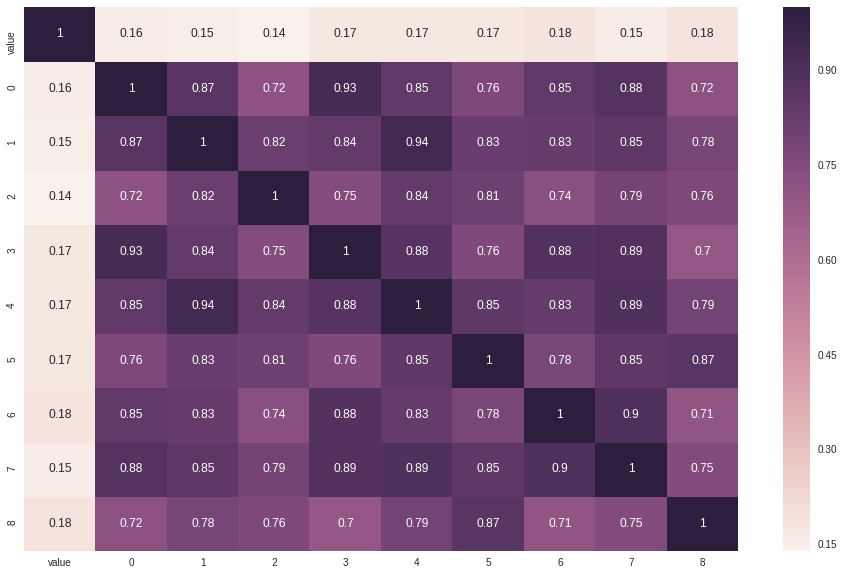

In [0]:
plt.figure(figsize=(16, 10))
sns.heatmap(df2.corr(),annot=True)

In [0]:
df2.plot(figsize=(16, 10))

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


<Figure size 1152x720 with 0 Axes>

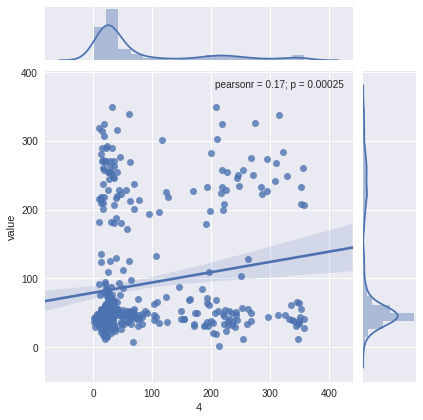

In [0]:
plt.figure(figsize=(16, 10))
ax=sns.jointplot("4", "value", data=df2, kind="reg",)

In [0]:
for column in df2.columns:
  df2["dif_"+column]=df2[column]-df2["value"]
  df2["dif_"+column]=df2["dif_"+column][df2["dif_"+column]<180]
  df2["dif_"+column]=df2["dif_"+column][df2["dif_"+column]>-180]
  

In [0]:
df2.iloc[:,11:21].describe()

,dif_0,dif_1,dif_2,dif_3,dif_4,dif_5,dif_6,dif_7,dif_8
count,371.000000,372.000000,374.000000,371.000000,374.000000,374.000000,374.000000,371.000000,370.000000
mean,-9.421723,-7.474781,0.298519,-10.520318,-8.307367,-1.897376,-9.212810,-10.497380,-6.456625
std,57.695141,59.566575,60.941494,54.776141,61.804403,62.796696,55.407452,56.801623,60.458236
min,-179.802982,-175.468933,-176.755825,-177.707050,-179.592083,-173.189995,-173.140042,-179.425243,-172.109777
25%,-30.942280,-33.180810,-25.998936,-29.329522,-33.108777,-30.621099,-26.912273,-31.040598,-34.865972
50%,-16.428450,-15.787441,-2.626112,-16.154772,-19.671538,-12.627790,-14.242843,-19.568016,-21.185576
75%,1.383494,11.305573,26.183850,0.261673,7.193949,24.539410,-0.704474,-0.881145,13.133261
max,178.082291,179.620987,177.348892,178.111053,178.875397,178.539246,178.793152,178.545700,179.934662


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


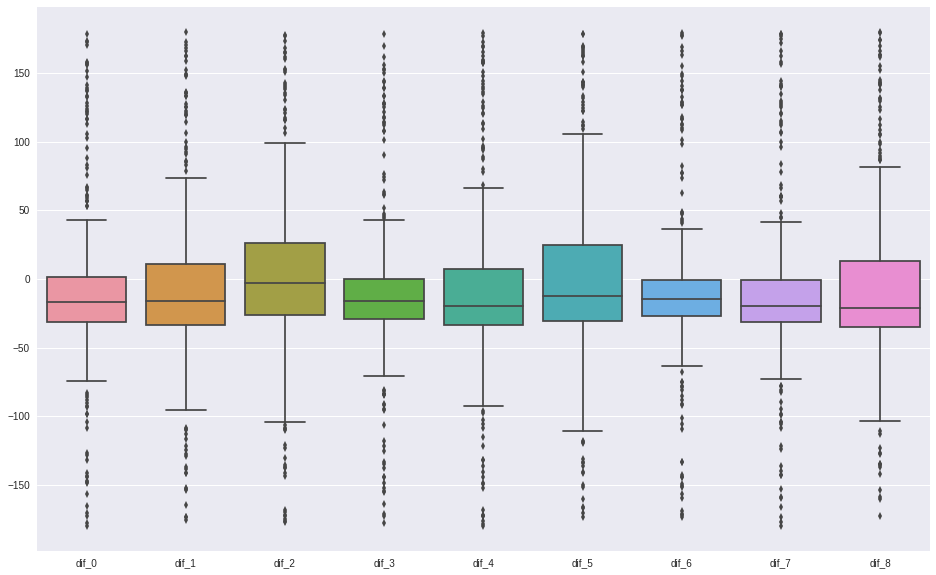

In [0]:
plt.figure(figsize=(16, 10))
ax = sns.boxplot(data=df2.iloc[:,11:21])
  
  

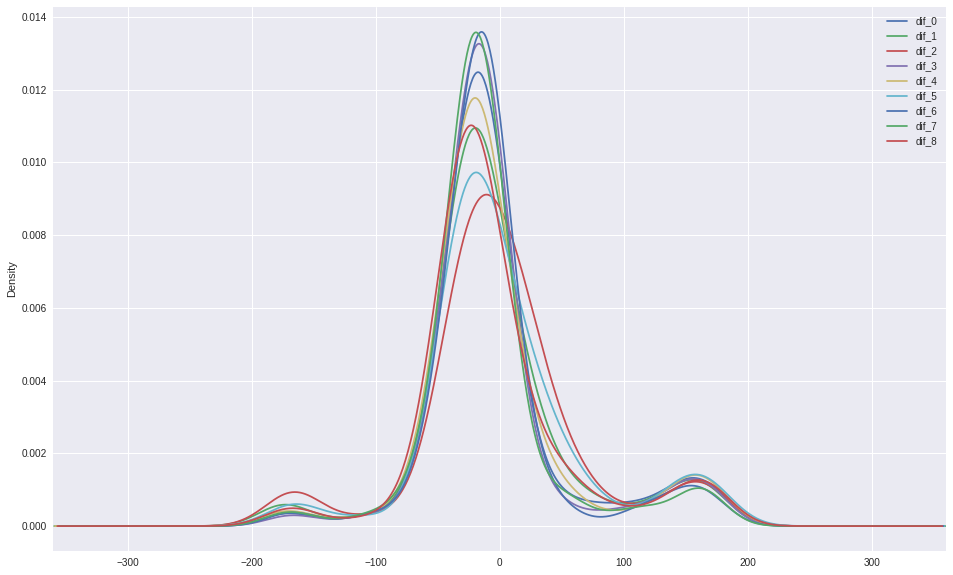

In [0]:
df2.iloc[:,11:21].plot(kind="kde",grid=True,xlim=(-360,360),figsize=(16, 10))

In [0]:
df2.iloc[:,11:21].describe()

,dif_0,dif_1,dif_2,dif_3,dif_4,dif_5,dif_6,dif_7,dif_8
count,306.000000,308.000000,312.000000,304.000000,303.000000,299.000000,301.000000,298.000000,297.000000
mean,-2.106883,-3.064843,0.943808,-3.959276,-3.457810,2.202050,-6.128879,-8.951296,-4.333373
std,60.565962,63.317378,66.996310,57.808705,62.111665,65.776225,55.169378,55.376670,62.859553
min,-177.262997,-179.755278,-177.769745,-175.445593,-179.767237,-177.247343,-177.400030,-178.118101,-178.463196
25%,-28.601854,-31.060418,-28.097784,-29.051233,-31.078506,-30.670671,-28.868591,-30.537676,-33.106586
50%,-15.142650,-14.542089,-6.859402,-14.447799,-16.373190,-12.422129,-14.038612,-17.748261,-17.880831
75%,1.688655,14.571807,23.689742,-1.875984,2.815392,23.117187,-0.669712,-2.166484,9.456928
max,179.818848,179.616287,178.816406,178.945908,178.463150,179.916382,179.324265,177.146881,178.439575
